In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mknn_df = pd.read_csv('../results/m_knn_merged.csv')

cos_df = pd.read_csv('../results/cosine_merged.csv')


In [3]:
model_dims = {'conch': 768,
              'uni': 1024,
              'pathdino': 384,
              'hibou_b': 768,
              'hibou_l': 1024,
              'phikon': 768,
              'phikon2': 1024,
              'prov_gigapath': 1536,
              'virchow': 2560,
              'virchow2': 3584,
              'kaiko_b': 512,
              'kaiko_l': 512}
model_sizes = {'conch': 395232769,
               'uni': 303350784,
               'pathdino': 9000000,
               'hibou_b': 85741056,
               'hibou_l': 303659264,
               'phikon': 85798656,
               'phikon2': 303351808,
               'prov_gigapath': 1134953984,
               'virchow': 631229184,
               'virchow2': 631239424,
               'kaiko_b': 85807872,
               'kaiko_l': 304370688}

rot_augmentation = {'conch': False,
                     'uni': False,
                     'pathdino': True,
                     'hibou_b': True,
                     'hibou_l': True,
                     'phikon': False,
                     'phikon2': False,
                     'prov_gigapath': False,
                     'virchow': False,
                     'virchow2': False,
                     'kaiko_b': False,
                     'kaiko_l': False}


In [4]:

mean_similarity_per_model = mknn_df.groupby('Model')['mean mNN Similarity'].mean().reset_index()
mean_similarity_per_model = mean_similarity_per_model.sort_values(by='mean mNN Similarity', ascending=False)
mean_similarity_per_model['emb. size'] = mean_similarity_per_model['Model'].map(model_dims)
mean_similarity_per_model['model size (M)'] = (mean_similarity_per_model['Model'].map(model_sizes).astype(float)/1000000).round(2)
mean_similarity_per_model['rot aug'] = mean_similarity_per_model['Model'].map(rot_augmentation)


mean_distance_per_model = cos_df.groupby('Model')['cosine distance'].mean().reset_index()
mean_distance_per_model = mean_distance_per_model.sort_values(by='cosine distance', ascending=True)
mean_distance_per_model['emb. size'] = mean_distance_per_model['Model'].map(model_dims)
mean_distance_per_model['model size (M)'] = (mean_distance_per_model['Model'].map(model_sizes).astype(float)/1000000).round(2)
mean_distance_per_model['rot aug'] = mean_distance_per_model['Model'].map(rot_augmentation)

mean_similarity_per_model.head()

,Model,mean mNN Similarity,emb. size,model size (M),rot aug
5,pathdino,0.849866,384,9.00,True
3,kaiko_b,0.827632,512,85.81,False
1,hibou_b,0.818459,768,85.74,True
6,phikon,0.796999,768,85.80,False
4,kaiko_l,0.781715,512,304.37,False


/var/folders/fd/w7v6kw250xjb6wx92_8ksr65sqhzct/T/ipykernel_17598/2649990218.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=40, fontsize=11, family='DejaVu Sans Mono')
/var/folders/fd/w7v6kw250xjb6wx92_8ksr65sqhzct/T/ipykernel_17598/2649990218.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=11, family='DejaVu Sans Mono')
/var/folders/fd/w7v6kw250xjb6wx92_8ksr65sqhzct/T/ipykernel_17598/2649990218.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=40, fontsize=11, family='DejaVu Sans Mono')
/var/folders/fd/w7v6kw250xjb6wx92_8ksr65sqhzct/T/ipykernel_17598/264

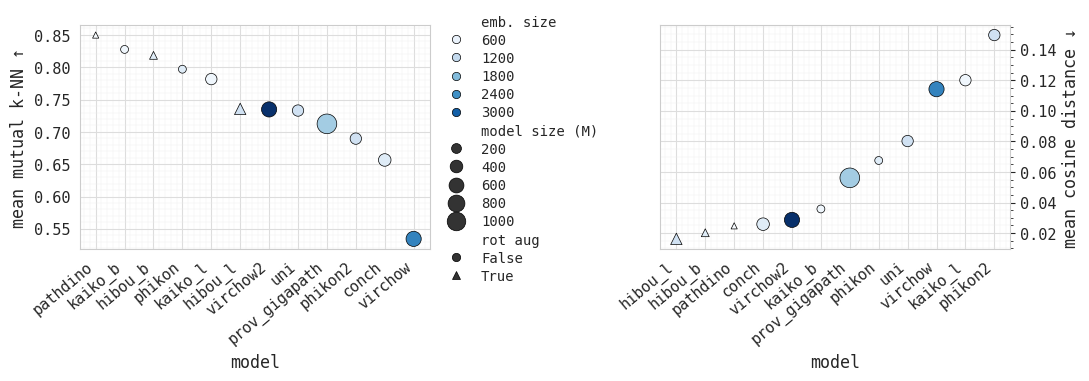

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# Set style
sns.set_style(rc={
    'xtick.top': False,
    'ytick.left': True,
})
markers = {True: "^", False: "o"}

# First scatterplot
s1 = sns.scatterplot(mean_similarity_per_model,
                     y='mean mNN Similarity',
                     x='Model',
                     hue='emb. size',
                     size='model size (M)',
                     sizes=(20, 200),
                     palette='Blues',
                     linewidth=0.5,
                     edgecolor="black",
                     legend=True,
                     style='rot aug',
                     markers=markers,
                     ax=axs[0])

# Customize legend
s1.legend(fontsize="medium",
          title_fontsize='x-large',
          prop=dict(family='DejaVu Sans Mono'),
          loc='upper left',
          bbox_to_anchor=(1, 1.1),
          labelspacing=0.3,
          frameon=False)

# Set xticks and yticks
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=40, fontsize=11, family='DejaVu Sans Mono')
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=11, family='DejaVu Sans Mono')

# Set labels
axs[0].set_xlabel('model', fontsize=12, family='DejaVu Sans Mono')
axs[0].set_ylabel(f"mean mutual k-NN ↑", fontsize=12, family='DejaVu Sans Mono')

# Add grid and minor ticks
axs[0].grid(which='major', color='#DDDDDD', linewidth=0.8)
axs[0].grid(which='minor', color='#EEEEEE', linestyle='solid', linewidth=0.3)
axs[0].minorticks_on()

# Ensure alignment of x-ticks
for tick in axs[0].xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

# Create a scatter plot to generate the legend
s2 = sns.scatterplot(mean_distance_per_model,
                     y='cosine distance',
                     x='Model',
                     hue='emb. size',
                     size='model size (M)',
                     sizes=(20, 200),
                     palette='Blues',
                     linewidth=0.5,
                     edgecolor="black",
                     legend=False,
                     style='rot aug',
                     markers=markers,
                     ax=axs[1])  # Set legend to True

axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=40, fontsize=11, family='DejaVu Sans Mono')
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=11, family='DejaVu Sans Mono')

axs[1].set_xlabel('model', fontsize=12, family='DejaVu Sans Mono')
axs[1].set_ylabel(f"mean cosine distance ↓", fontsize=12, family='DejaVu Sans Mono')


axs[1].grid(which='major', color='#DDDDDD', linewidth=0.8)
axs[1].grid(which='minor', color='#EEEEEE', linestyle='solid', linewidth=0.3)
axs[1].minorticks_on()

for tick in axs[1].xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

# Tight layout and saving the figure
plt.tight_layout()
plt.savefig('distance-plot.svg')
